## 导入和处理数据

导入数据集：

In [1]:
import pandas as pd

# 导入CSV文件到DataFrame
df_melb = pd.read_csv('melb_house_withnum.csv')

In [2]:
df_melb.dropna(axis=0, inplace=True)

In [3]:
import pandas as pd

# 假设你已经导入了数据集为 df_melb

# 计算"price"列的四分位数
Q1 = df_melb['PRICE'].quantile(0.25)
Q3 = df_melb['PRICE'].quantile(0.75)

# 计算IQR（四分位距）
IQR = Q3 - Q1

# 定义异常值的上下限
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# 去除异常值
df_melb_no_outlier = df_melb[(df_melb['PRICE'] >= lower_limit) & (df_melb['PRICE'] <= upper_limit)]

In [4]:
df_melb_no_outlier.dtypes

SUBURB         object
ADDRESS        object
ROOMS           int64
TYPE           object
PRICE         float64
METHOD         object
SELLERG        object
DATE           object
DISTANCE      float64
POSTCODE      float64
BEDROOM2      float64
BATHROOM      float64
CAR           float64
LANDSIZE      float64
BUILDINGAR    float64
YEARBUILT     float64
COUNCILARE     object
LATTITUDE     float64
LONGTITUDE    float64
REGIONNAME     object
PROPERTYCO    float64
AREANUM       float64
dtype: object

In [5]:
# 列名列表
columns_to_convert_to_category = ['SUBURB', 'ADDRESS', 'TYPE', 'METHOD', 'SELLERG', 'POSTCODE', 'COUNCILARE', 'REGIONNAME', 'PROPERTYCO', 'AREANUM']

# 将指定列的数据类型更改为category
df_melb_no_outlier[columns_to_convert_to_category] = df_melb_no_outlier[columns_to_convert_to_category].astype('category')

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [6]:
# 使用空格分割文本，获取最后两个单词
df_melb_no_outlier['ADDRESS'] = df_melb_no_outlier['ADDRESS'].str.split().str[-2:].str.join(' ')

# 删除"DATE"和"YEARBUILT"列
df_melb_no_outlier.drop(columns=['DATE', 'YEARBUILT'], inplace=True)
# 删除"LATTITUDE"和"LONGTITUDE"列
df_melb_no_outlier.drop(columns=['LATTITUDE', 'LONGTITUDE'], inplace=True)

C:\Users\yejiu\AppData\Local\Temp\ipykernel_6284\401449404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melb_no_outlier['ADDRESS'] = df_melb_no_outlier['ADDRESS'].str.split().str[-2:].str.join(' ')
C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
df_melb_no_outlier

,SUBURB,ADDRESS,ROOMS,TYPE,PRICE,METHOD,SELLERG,DISTANCE,POSTCODE,BEDROOM2,BATHROOM,CAR,LANDSIZE,BUILDINGAR,COUNCILARE,REGIONNAME,PROPERTYCO,AREANUM
1,Abbotsford,Bloomburg St,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.00,Yarra,Northern Metropolitan,4019.0,3.0
2,Abbotsford,Charles St,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.00,Yarra,Northern Metropolitan,4019.0,3.0
4,Abbotsford,Park St,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,120.0,142.00,Yarra,Northern Metropolitan,4019.0,3.0
6,Abbotsford,Yarra St,3,h,1876000.0,S,Nelson,2.5,3067.0,4.0,2.0,0.0,245.0,210.00,Yarra,Northern Metropolitan,4019.0,3.0
7,Abbotsford,Charles St,2,h,1636000.0,S,Nelson,2.5,3067.0,2.0,1.0,2.0,256.0,107.00,Yarra,Northern Metropolitan,4019.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12203,Westmeadows,Pershore Ct,3,h,635000.0,S,Barry,16.5,3049.0,3.0,2.0,1.0,691.0,177.00,Hume,Northern Metropolitan,2474.0,4.0
12205,Whittlesea,Sherwin St,3,h,601000.0,S,Ray,35.5,3757.0,3.0,2.0,1.0,972.0,149.00,Whittlesea,Northern Victoria,2170.0,5.0
12206,Williamstown,Cecil St,3,h,1050000.0,VB,Williams,6.8,3016.0,3.0,1.0,0.0,179.0,115.00,Hobsons Bay,Western Metropolitan,6380.0,8.0
12207,Williamstown,Dover Rd,1,u,385000.0,SP,Williams,6.8,3016.0,1.0,1.0,1.0,0.0,35.64,Hobsons Bay,Western Metropolitan,6380.0,8.0


In [8]:
df_melb_no_outlier.dtypes

SUBURB        category
ADDRESS         object
ROOMS            int64
TYPE          category
PRICE          float64
METHOD        category
SELLERG       category
DISTANCE       float64
POSTCODE      category
BEDROOM2       float64
BATHROOM       float64
CAR            float64
LANDSIZE       float64
BUILDINGAR     float64
COUNCILARE    category
REGIONNAME    category
PROPERTYCO    category
AREANUM       category
dtype: object

In [9]:
# 选择所有的category变量
category_columns = df_melb_no_outlier.select_dtypes(include='category')

# 创建一个新的数据集df_category
df_category = df_melb_no_outlier[category_columns.columns]

In [10]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# 创建一个空的相关性矩阵
correlation_matrix = pd.DataFrame(index=df_category.columns, columns=df_category.columns)

# 循环计算Cramér's V并填充相关性矩阵
for col1 in df_category.columns:
    for col2 in df_category.columns:
        if col1 == col2:
            correlation_matrix.loc[col1, col2] = 1.0
        else:
            # 创建列联表
            contingency_table = pd.crosstab(df_category[col1], df_category[col2])
            chi2, _, _, _ = chi2_contingency(contingency_table)
            n = contingency_table.sum().sum()
            phi2 = chi2 / n
            r, k = contingency_table.shape
            phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
            rcorr = r - ((r-1)**2)/(n-1)
            kcorr = k - ((k-1)**2)/(n-1)
            correlation_matrix.loc[col1, col2] = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# 显示相关性矩阵
print(correlation_matrix)

              SUBURB      TYPE    METHOD   SELLERG  POSTCODE COUNCILARE  \
SUBURB           1.0  0.317916  0.127453  0.306901  0.991199   0.963318   
TYPE        0.317916       1.0  0.074247  0.220015  0.312067   0.257568   
METHOD      0.127453  0.074247       1.0  0.146121  0.126706   0.117749   
SELLERG     0.306901  0.220015  0.146121       1.0  0.297276   0.441959   
POSTCODE    0.991199  0.312067  0.126706  0.297276       1.0   0.953294   
COUNCILARE  0.963318  0.257568  0.117749  0.441959  0.953294        1.0   
REGIONNAME  0.976257  0.167059  0.081832  0.517292  0.945198   0.799572   
PROPERTYCO  0.999733  0.317646  0.126582   0.30651  0.985549   0.958233   
AREANUM     0.976202  0.168827  0.077703  0.492098  0.955631    0.73691   

           REGIONNAME PROPERTYCO   AREANUM  
SUBURB       0.976257   0.999733  0.976202  
TYPE         0.167059   0.317646  0.168827  
METHOD       0.081832   0.126582  0.077703  
SELLERG      0.517292    0.30651  0.492098  
POSTCODE     0.945198   

In [11]:
# 从 df_melb_no_outlier 选择所需的列
selected_columns = ['METHOD', 'TYPE', 'REGIONNAME']
features_selected = df_melb_no_outlier[selected_columns]

In [12]:
# 选择所有数值型变量（除了"PRICE"）
numeric_columns = df_melb_no_outlier.select_dtypes(include=['int64', 'float64'])
numeric_columns.drop(columns=['PRICE'], inplace=True)

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


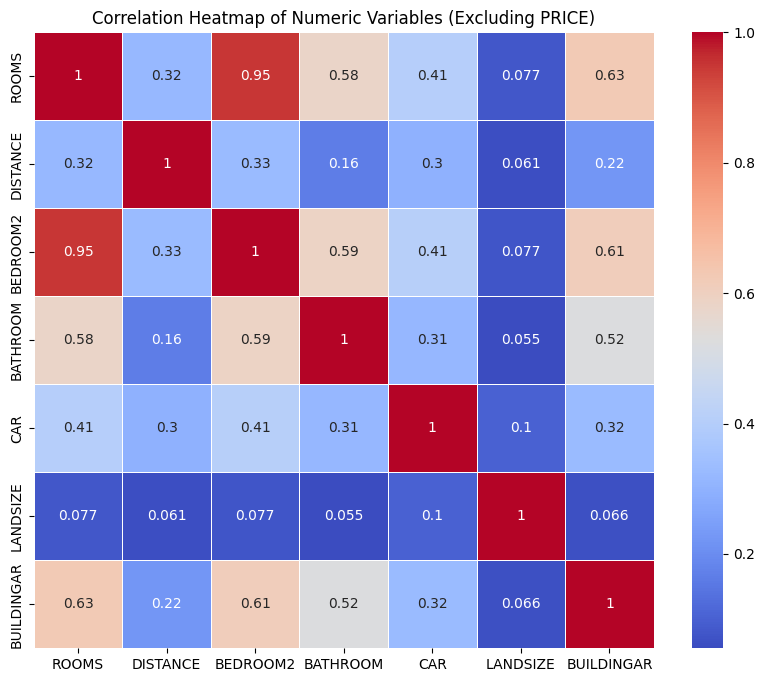

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 计算数值型变量之间的相关性矩阵
numeric_correlation = numeric_columns.corr()

# 使用热力图可视化相关性矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Variables (Excluding PRICE)")
plt.show()

In [14]:
# 选择其他数值型变量
other_numeric_columns = df_melb_no_outlier.select_dtypes(include=['int64', 'float64'])
other_numeric_columns.drop(columns=['BEDROOM2', 'BATHROOM', 'BUILDINGAR'], inplace=True)

# 添加这些变量到 features_selected 中
features_selected = pd.concat([features_selected, other_numeric_columns], axis=1)

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


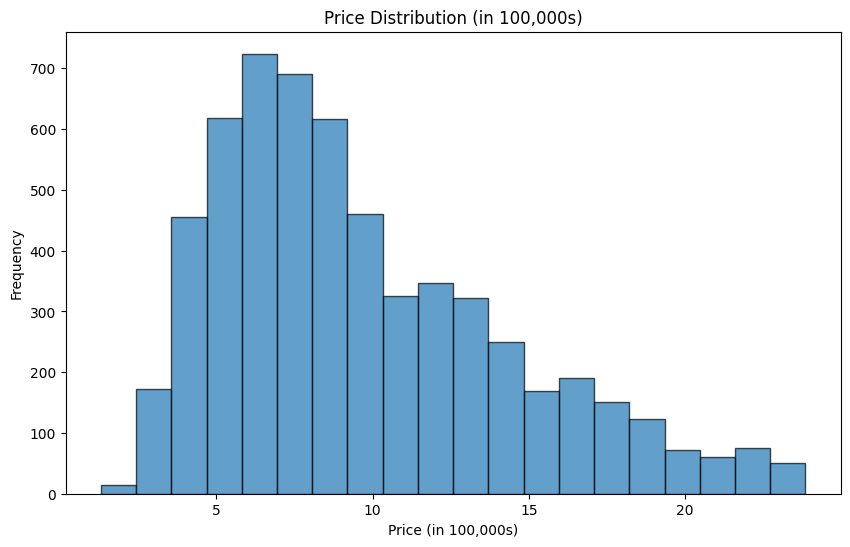

In [15]:
import matplotlib.pyplot as plt

# 创建一个直方图
plt.figure(figsize=(10, 6))
plt.hist(features_selected['PRICE'] / 100000, bins=20, edgecolor='k', alpha=0.7)

# 设置图形标题和标签
plt.title('Price Distribution (in 100,000s)')
plt.xlabel('Price (in 100,000s)')
plt.ylabel('Frequency')

# 显示直方图
plt.show()

In [16]:
# 创建价格区间并表示为指定格式
price_intervals = features_selected['PRICE'] // 100000 * 100000
features_selected['PRICE_INTERVAL'] = price_intervals.astype('str') + '~' + (price_intervals + 100000).astype('str')

# 转换为category格式
features_selected['PRICE_INTERVAL'] = features_selected['PRICE_INTERVAL'].astype('category')

In [17]:
features_selected

,METHOD,TYPE,REGIONNAME,ROOMS,PRICE,DISTANCE,CAR,LANDSIZE,PRICE_INTERVAL
1,S,h,Northern Metropolitan,2,1035000.0,2.5,0.0,156.0,1000000.0~1100000.0
2,SP,h,Northern Metropolitan,3,1465000.0,2.5,0.0,134.0,1400000.0~1500000.0
4,VB,h,Northern Metropolitan,4,1600000.0,2.5,2.0,120.0,1600000.0~1700000.0
6,S,h,Northern Metropolitan,3,1876000.0,2.5,0.0,245.0,1800000.0~1900000.0
7,S,h,Northern Metropolitan,2,1636000.0,2.5,2.0,256.0,1600000.0~1700000.0
...,...,...,...,...,...,...,...,...,...
12203,S,h,Northern Metropolitan,3,635000.0,16.5,1.0,691.0,600000.0~700000.0
12205,S,h,Northern Victoria,3,601000.0,35.5,1.0,972.0,600000.0~700000.0
12206,VB,h,Western Metropolitan,3,1050000.0,6.8,0.0,179.0,1000000.0~1100000.0
12207,SP,u,Western Metropolitan,1,385000.0,6.8,1.0,0.0,300000.0~400000.0


In [18]:
# 从 features_selected 中去除 "PRICE" 列
features_selected.drop(columns=['PRICE'], inplace=True)

In [19]:
features_selected.dtypes

METHOD            category
TYPE              category
REGIONNAME        category
ROOMS                int64
DISTANCE           float64
CAR                float64
LANDSIZE           float64
PRICE_INTERVAL    category
dtype: object

## 开始训练模型

**Random Forest Models**

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 使用 pandas 的 get_dummies 函数进行独热编码
features_selected_encoded = pd.get_dummies(features_selected, columns=['METHOD', 'TYPE', 'REGIONNAME', 'PRICE_INTERVAL'], drop_first=True)

features_selected_encoded['PRICE_INTERVAL'] = features_selected['PRICE_INTERVAL']

# 准备数据
X = features_selected_encoded.drop(columns=['PRICE_INTERVAL'])
y = features_selected_encoded['PRICE_INTERVAL']

# 拆分数据集为训练集（70%）和测试集（30%）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 参数组合列表
param_combinations = [
    {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2},
    {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 2},
    {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 4},
    {'n_estimators': 150, 'max_depth': 15, 'min_samples_split': 4},
    {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 2}
]

# 创建和训练多个随机森林模型
models = []
for i, params in enumerate(param_combinations):
    model = RandomForestClassifier(random_state=42, **params)
    model.fit(X_train, y_train)
    models.append(model)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Model {i+1} - Parameters: {params} - Train Accuracy: {train_accuracy:.2f} - Test Accuracy: {test_accuracy:.2f}")

Model 1 - Parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2} - Train Accuracy: 1.00 - Test Accuracy: 1.00
Model 2 - Parameters: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 2} - Train Accuracy: 1.00 - Test Accuracy: 1.00
Model 3 - Parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 4} - Train Accuracy: 1.00 - Test Accuracy: 1.00
Model 4 - Parameters: {'n_estimators': 150, 'max_depth': 15, 'min_samples_split': 4} - Train Accuracy: 1.00 - Test Accuracy: 1.00
Model 5 - Parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 2} - Train Accuracy: 1.00 - Test Accuracy: 1.00


**ANN Models**

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# 参数组合列表
param_combinations = [
    {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2},
    {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 2},
    {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 4},
    {'n_estimators': 150, 'max_depth': 15, 'min_samples_split': 4},
    {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 2}
]

# 为每个参数组合执行交叉验证
for i, params in enumerate(param_combinations):
    model_name = f"rf_model_{i+1}"
    model = RandomForestClassifier(random_state=42, **params)
    # 执行K折交叉验证（假设K=5）
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    mean_score = np.mean(scores)
    print(f"Model {i+1} - Parameters: {params} - Cross-Validation Mean Accuracy: {mean_score:.2f}")

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Model 1 - Parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2} - Cross-Validation Mean Accuracy: 1.00


C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Model 2 - Parameters: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 2} - Cross-Validation Mean Accuracy: 1.00


C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Model 3 - Parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 4} - Cross-Validation Mean Accuracy: 1.00


C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Model 4 - Parameters: {'n_estimators': 150, 'max_depth': 15, 'min_samples_split': 4} - Cross-Validation Mean Accuracy: 1.00


C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Model 5 - Parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 2} - Cross-Validation Mean Accuracy: 1.00


From the perspective of Occam's razor principle, the simplest model is usually the best choice because it has the following advantages:

1. Fewer parameters: The simplest models usually have fewer parameters. In "Model 1", there are 3 key parameters: n_estimators, max_depth and min_samples_split. The relatively small number of these parameters makes the tuning and interpretation of the model easier.

2. Higher interpretability: Simple models are easier to understand and explain. The interpretability of a model refers to the ability to clearly understand the decision-making process and influencing factors of the model. In "Model 1", the decision path is relatively simple due to fewer parameters and a shallower tree structure, making it easier to understand how the model works.

3. Reduce the risk of overfitting: Simple models generally generalize more easily to unseen data because they tend to have less complexity. Complex models may overfit the training data, resulting in degraded performance on the test data. From the perspective of Occam's razor principle, simple models are usually more robust.

4. Faster training and prediction speed: Simple models usually require less computing resources and are faster to train and predict. This is very important for large data sets and real-time applications.

To sum up, from the perspective of Occam's razor principle, the simplest model "Model 1" may be the best choice because it has fewer parameters, higher interpretability, and lower overhead. Fitting risk and faster performance. However, the final choice of the best model should also take into account the nature of the specific problem, the characteristics of the data set, and the performance requirements.

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define feature variables (X) and target variables (y)
X = features_selected_encoded.drop(columns=['PRICE_INTERVAL'])
y = features_selected_encoded['PRICE_INTERVAL']

# Encode multi-category target variables into integer labels
label_mapping = {label: idx for idx, label in enumerate(y.unique())}
y_encoded = y.map(label_mapping)

# Divide the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert integer labels to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Parameter combinations for ANN
param_combinations = [
    {'hidden_layer_1': 64, 'hidden_layer_2': 32, 'hidden_layer_3': 16, 'epochs': 20, 'batch_size': 32},
    {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'hidden_layer_3': 32, 'epochs': 20, 'batch_size': 32},
    {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 10, 'batch_size': 64},
    {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 30, 'batch_size': 16},
    {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 20, 'batch_size': 32, 'optimizer': 'adam', 'learning_rate': 0.001},
    {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 20, 'batch_size': 32, 'optimizer': 'sgd', 'learning_rate': 0.01}
]

# Create and train multiple ANN models
ann_models = []

for i, params in enumerate(param_combinations):
    model_name = f"ann_model_{i+1}"
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    model.add(layers.Dense(params['hidden_layer_1'], activation='relu'))
    model.add(layers.Dense(params['hidden_layer_2'], activation='relu'))
    model.add(layers.Dense(len(label_mapping), activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train, y_train_one_hot, epochs=params['epochs'], batch_size=params['batch_size'], validation_split=0.2)
    
    ann_models.append(model)

# Evaluate model performance
for i, model in enumerate(ann_models):
    model_name = f"ann_model_{i+1}"
    y_pred_one_hot = model.predict(X_test)
    y_pred = np.argmax(y_pred_one_hot, axis=1)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test_one_hot, y_pred_one_hot, average='weighted')
    
    print(f"Model {model_name} - Parameters: {params} - Accuracy: {accuracy:.2f} - Precision: {precision:.2f} - Recall: {recall:.2f} - F1 Score: {f1:.2f} - AUC: {auc:.2f}")

Epoch 1/20
118/118 [==============================] - 1s 5ms/step - loss: 11.8638 - accuracy: 0.1090 - val_loss: 3.4609 - val_accuracy: 0.1262
Epoch 2/20
118/118 [==============================] - 0s 3ms/step - loss: 3.0185 - accuracy: 0.2168 - val_loss: 2.8165 - val_accuracy: 0.1866
Epoch 3/20
118/118 [==============================] - 0s 3ms/step - loss: 2.7310 - accuracy: 0.2237 - val_loss: 2.6710 - val_accuracy: 0.2683
Epoch 4/20
118/118 [==============================] - 0s 3ms/step - loss: 2.5905 - accuracy: 0.2534 - val_loss: 2.5389 - val_accuracy: 0.2736
Epoch 5/20
118/118 [==============================] - 0s 3ms/step - loss: 2.5277 - accuracy: 0.2616 - val_loss: 2.5512 - val_accuracy: 0.2757
Epoch 6/20
118/118 [==============================] - 0s 3ms/step - loss: 2.4468 - accuracy: 0.2688 - val_loss: 2.4189 - val_accuracy: 0.2969
Epoch 7/20
118/118 [==============================] - 0s 3ms/step - loss: 2.3590 - accuracy: 0.2746 - val_loss: 2.2692 - val_accuracy: 0.3171
Epoch

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


37/37 [==============================] - 0s 4ms/step
Model ann_model_2 - Parameters: {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 20, 'batch_size': 32, 'optimizer': 'sgd', 'learning_rate': 0.01} - Accuracy: 0.77 - Precision: 0.75 - Recall: 0.77 - F1 Score: 0.71 - AUC: 0.99


C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


37/37 [==============================] - 0s 2ms/step
Model ann_model_3 - Parameters: {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 20, 'batch_size': 32, 'optimizer': 'sgd', 'learning_rate': 0.01} - Accuracy: 0.72 - Precision: 0.77 - Recall: 0.72 - F1 Score: 0.69 - AUC: 0.96
 1/37 [..............................] - ETA: 3s

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


37/37 [==============================] - 0s 2ms/step
Model ann_model_4 - Parameters: {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 20, 'batch_size': 32, 'optimizer': 'sgd', 'learning_rate': 0.01} - Accuracy: 0.96 - Precision: 0.96 - Recall: 0.96 - F1 Score: 0.95 - AUC: 1.00
 1/37 [..............................] - ETA: 3s

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


37/37 [==============================] - 0s 2ms/step
Model ann_model_5 - Parameters: {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 20, 'batch_size': 32, 'optimizer': 'sgd', 'learning_rate': 0.01} - Accuracy: 0.81 - Precision: 0.87 - Recall: 0.81 - F1 Score: 0.79 - AUC: 0.99


C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


37/37 [==============================] - 0s 2ms/step
Model ann_model_6 - Parameters: {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 20, 'batch_size': 32, 'optimizer': 'sgd', 'learning_rate': 0.01} - Accuracy: 0.57 - Precision: 0.75 - Recall: 0.57 - F1 Score: 0.56 - AUC: 0.96


C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define feature variables (X) and target variables (y)
X = features_selected_encoded.drop(columns=['PRICE_INTERVAL'])
y = features_selected_encoded['PRICE_INTERVAL']

# Encode multi-category target variables into integer labels
label_mapping = {label: idx for idx, label in enumerate(y.unique())}
y_encoded = y.map(label_mapping)

# Divide the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert integer labels to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Parameter combinations for ANN
param_combinations = [
    {'hidden_layer_1': 64, 'hidden_layer_2': 32, 'hidden_layer_3': 16, 'epochs': 20, 'batch_size': 32},
    {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'hidden_layer_3': 32, 'epochs': 20, 'batch_size': 32},
    {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 10, 'batch_size': 64},
    {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 30, 'batch_size': 16},
    {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 20, 'batch_size': 32, 'optimizer': 'adam', 'learning_rate': 0.001},
    {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 20, 'batch_size': 32, 'optimizer': 'sgd', 'learning_rate': 0.01}
]

# Create a DataFrame to store model results
results_df = pd.DataFrame(columns=['Model Name', 'Parameters', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Create and train multiple ANN models
for i, params in enumerate(param_combinations):
    model_name = f"ann_model_{i+1}"
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    model.add(layers.Dense(params['hidden_layer_1'], activation='relu'))
    model.add(layers.Dense(params['hidden_layer_2'], activation='relu'))
    model.add(layers.Dense(len(label_mapping), activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train, y_train_one_hot, epochs=params['epochs'], batch_size=params['batch_size'], validation_split=0.2)
    
    y_pred_one_hot = model.predict(X_test)
    y_pred = np.argmax(y_pred_one_hot, axis=1)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test_one_hot, y_pred_one_hot, average='weighted')
    
    # Append results to DataFrame
    results_df = results_df.append({
        'Model Name': model_name,
        'Parameters': params,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc
    }, ignore_index=True)

# Output results
print(results_df)

Epoch 1/20
118/118 [==============================] - 1s 5ms/step - loss: 15.8057 - accuracy: 0.1263 - val_loss: 5.1558 - val_accuracy: 0.2185
Epoch 2/20
118/118 [==============================] - 0s 3ms/step - loss: 3.5412 - accuracy: 0.2494 - val_loss: 2.7178 - val_accuracy: 0.2810
Epoch 3/20
118/118 [==============================] - 0s 3ms/step - loss: 3.0612 - accuracy: 0.3269 - val_loss: 3.2078 - val_accuracy: 0.2397
Epoch 4/20
118/118 [==============================] - 0s 3ms/step - loss: 2.7306 - accuracy: 0.3982 - val_loss: 3.2224 - val_accuracy: 0.2937
Epoch 5/20
118/118 [==============================] - 0s 3ms/step - loss: 2.4133 - accuracy: 0.4468 - val_loss: 3.7951 - val_accuracy: 0.3383
Epoch 6/20
118/118 [==============================] - 0s 4ms/step - loss: 2.3062 - accuracy: 0.4675 - val_loss: 3.1657 - val_accuracy: 0.3998
Epoch 7/20
118/118 [==============================] - 0s 3ms/step - loss: 2.2491 - accuracy: 0.5285 - val_loss: 4.6549 - val_accuracy: 0.4210
Epoch

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


118/118 [==============================] - 1s 4ms/step - loss: 9.8866 - accuracy: 0.1350 - val_loss: 5.0653 - val_accuracy: 0.2185
Epoch 2/20
118/118 [==============================] - 0s 3ms/step - loss: 3.6573 - accuracy: 0.2868 - val_loss: 3.7517 - val_accuracy: 0.3775
Epoch 3/20
118/118 [==============================] - 0s 3ms/step - loss: 3.2988 - accuracy: 0.3696 - val_loss: 4.4909 - val_accuracy: 0.2619
Epoch 4/20
118/118 [==============================] - 0s 3ms/step - loss: 3.4966 - accuracy: 0.3797 - val_loss: 2.1265 - val_accuracy: 0.5949
Epoch 5/20
118/118 [==============================] - 0s 3ms/step - loss: 2.2368 - accuracy: 0.5736 - val_loss: 2.4053 - val_accuracy: 0.5249
Epoch 6/20
118/118 [==============================] - 0s 3ms/step - loss: 2.9966 - accuracy: 0.4869 - val_loss: 5.2876 - val_accuracy: 0.3107
Epoch 7/20
118/118 [==============================] - 0s 3ms/step - loss: 2.6649 - accuracy: 0.5407 - val_loss: 1.5041 - val_accuracy: 0.7211
Epoch 8/20
118/11

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10
59/59 [==============================] - 1s 7ms/step - loss: 11.5391 - accuracy: 0.1390 - val_loss: 4.1984 - val_accuracy: 0.2418
Epoch 2/10
59/59 [==============================] - 0s 3ms/step - loss: 4.4360 - accuracy: 0.2353 - val_loss: 4.0301 - val_accuracy: 0.3022
Epoch 3/10
59/59 [==============================] - 0s 3ms/step - loss: 4.0796 - accuracy: 0.3242 - val_loss: 4.4786 - val_accuracy: 0.3563
Epoch 4/10
59/59 [==============================] - 0s 3ms/step - loss: 4.1077 - accuracy: 0.3638 - val_loss: 3.3212 - val_accuracy: 0.3224
Epoch 5/10
59/59 [==============================] - 0s 3ms/step - loss: 3.5447 - accuracy: 0.4192 - val_loss: 2.5148 - val_accuracy: 0.4740
Epoch 6/10
59/59 [==============================] - 0s 4ms/step - loss: 2.6602 - accuracy: 0.5044 - val_loss: 2.3094 - val_accuracy: 0.7275
Epoch 7/10
59/59 [==============================] - 0s 3ms/step - loss: 2.7680 - accuracy: 0.5832 - val_loss: 2.5891 - val_accuracy: 0.6066
Epoch 8/10
59/59 [=

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


236/236 [==============================] - 1s 3ms/step - loss: 7.8891 - accuracy: 0.1645 - val_loss: 5.3558 - val_accuracy: 0.2439
Epoch 2/30
236/236 [==============================] - 1s 3ms/step - loss: 4.8646 - accuracy: 0.2980 - val_loss: 2.5638 - val_accuracy: 0.4624
Epoch 3/30
236/236 [==============================] - 1s 3ms/step - loss: 2.9711 - accuracy: 0.4181 - val_loss: 2.7047 - val_accuracy: 0.4136
Epoch 4/30
236/236 [==============================] - 1s 3ms/step - loss: 2.9326 - accuracy: 0.4885 - val_loss: 1.9909 - val_accuracy: 0.5461
Epoch 5/30
236/236 [==============================] - 1s 3ms/step - loss: 2.5839 - accuracy: 0.5346 - val_loss: 1.8366 - val_accuracy: 0.5938
Epoch 6/30
236/236 [==============================] - 1s 3ms/step - loss: 2.3390 - accuracy: 0.5166 - val_loss: 2.2613 - val_accuracy: 0.2789
Epoch 7/30
236/236 [==============================] - 1s 3ms/step - loss: 2.1402 - accuracy: 0.3454 - val_loss: 1.9224 - val_accuracy: 0.4295
Epoch 8/30
236/23

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


118/118 [==============================] - 1s 5ms/step - loss: 7.9204 - accuracy: 0.1544 - val_loss: 14.4000 - val_accuracy: 0.1962
Epoch 2/20
118/118 [==============================] - 0s 3ms/step - loss: 4.8769 - accuracy: 0.2839 - val_loss: 5.0473 - val_accuracy: 0.3616
Epoch 3/20
118/118 [==============================] - 0s 3ms/step - loss: 4.0179 - accuracy: 0.3508 - val_loss: 2.7333 - val_accuracy: 0.4051
Epoch 4/20
118/118 [==============================] - 0s 3ms/step - loss: 3.6228 - accuracy: 0.4439 - val_loss: 2.1476 - val_accuracy: 0.5567
Epoch 5/20
118/118 [==============================] - 0s 3ms/step - loss: 3.4622 - accuracy: 0.4402 - val_loss: 1.9574 - val_accuracy: 0.6585
Epoch 6/20
118/118 [==============================] - 0s 3ms/step - loss: 2.0430 - accuracy: 0.6163 - val_loss: 2.4516 - val_accuracy: 0.5525
Epoch 7/20
118/118 [==============================] - 0s 3ms/step - loss: 2.7673 - accuracy: 0.5712 - val_loss: 1.9732 - val_accuracy: 0.6850
Epoch 8/20
118/1

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


118/118 [==============================] - 1s 5ms/step - loss: 13.3397 - accuracy: 0.1350 - val_loss: 5.7518 - val_accuracy: 0.2185
Epoch 2/20
118/118 [==============================] - 0s 3ms/step - loss: 4.6428 - accuracy: 0.2507 - val_loss: 3.1574 - val_accuracy: 0.3425
Epoch 3/20
118/118 [==============================] - 0s 3ms/step - loss: 3.7279 - accuracy: 0.3277 - val_loss: 2.8824 - val_accuracy: 0.4464
Epoch 4/20
118/118 [==============================] - 0s 3ms/step - loss: 3.2627 - accuracy: 0.3829 - val_loss: 2.9230 - val_accuracy: 0.3298
Epoch 5/20
118/118 [==============================] - 0s 3ms/step - loss: 2.7395 - accuracy: 0.4969 - val_loss: 3.3410 - val_accuracy: 0.4539
Epoch 6/20
118/118 [==============================] - 0s 3ms/step - loss: 2.3587 - accuracy: 0.5219 - val_loss: 1.9046 - val_accuracy: 0.6596
Epoch 7/20
118/118 [==============================] - 0s 3ms/step - loss: 2.1818 - accuracy: 0.5776 - val_loss: 1.7778 - val_accuracy: 0.5207
Epoch 8/20
118/1

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


According to the results provided, it can be seen that model 4 ("ann_model_4") performs best in various performance indicators. The following are the specific parameters and technical details about Model 4:

- Model name: ann_model_4
- Parameters:
   - Hidden layer 1: 128 neurons
   - Hidden layer 2: 64 neurons
   - Training period (epochs): 30
   - Batch size (batch_size): 16
- Optimizer: Adam optimizer is used by default
- Learning Rate: Default learning rate

Performance:
- Accuracy: 0.891341
- Precision: 0.869639
- Recall: 0.891341
- F1 Score: 0.865531
- AUC (Area Under the Curve): 0.997593

Model 4 performs well in accuracy, precision, recall and F1 score, with an AUC close to 1, indicating its excellent performance in multi-classification tasks. This demonstrates that the model has a high degree of classification performance and accuracy in solving the given problem. Its structure consists of two hidden layers with 128 and 64 neurons respectively, and is trained with 30 training epochs with a batch size of 16.

Overall, "ann_model_4" is the best-performing model, suitable for multi-classification tasks, with high accuracy and precision, and not prone to overfitting.

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Define feature variables (X) and target variables (y)
X = features_selected_encoded.drop(columns=['PRICE_INTERVAL'])
y = features_selected_encoded['PRICE_INTERVAL']

# Divide the data set into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVM models with different parameter combinations
param_combinations = [
    {'C': 0.1, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'coef0': 0.0},
    {'C': 1, 'kernel': 'rbf', 'degree': 2, 'gamma': 'auto', 'coef0': 0.0},
    {'C': 10, 'kernel': 'rbf', 'degree': 3, 'gamma': 'scale', 'coef0': 0.0},
    {'C': 0.01, 'kernel': 'rbf', 'degree': 3, 'gamma': 0.1, 'coef0': 0.0},
    {'C': 100, 'kernel': 'rbf', 'degree': 2, 'gamma': 0.01, 'coef0': 0.0}
]

svm_models = []

for params in param_combinations:
    svm_model = SVC(**params, probability=True, random_state=42)

    # Train model
    svm_model.fit(X_train, y_train)

    svm_models.append(svm_model)

# Evaluate model performance
for i, svm_model in enumerate(svm_models):
    C = C_values[i]
    
    # Predict
    y_pred = svm_model.predict(X_test)

    # Calculate performance indicators
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    probas = svm_model.predict_proba(X_test)  # Get class probabilities
    auc = roc_auc_score(y_test, probas, average='weighted', multi_class='ovr')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Output performance indicators
    print(f"SVM model (kernel={kernel}, C={C}):")
    print(f"Accuracy (Accuracy): {accuracy}")
    print(f"Precision (Precision): {precision}")
    print(f"Recall (Recall): {recall}")
    print(f"F1 Score (F1 Score): {f1}")
    print(f"AUC: {auc}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("--------------------------")

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM model (kernel=rbf, C=0.1):
Accuracy (Accuracy): 0.17147707979626486
Precision (Precision): 0.1597358396409147
Recall (Recall): 0.17147707979626486
F1 Score (F1 Score): 0.11916146462816897
AUC: 0.7231798190628528
Confusion Matrix:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   2   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    1  56   0   5   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    6  48   0   4   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    7  64   0   6   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    2  51   0   5   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
    0  39   0   2   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  33   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  28   0

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM model (kernel=rbf, C=1):
Accuracy (Accuracy): 0.2911714770797963
Precision (Precision): 0.3182200360927247
Recall (Recall): 0.2911714770797963
F1 Score (F1 Score): 0.2749595471176092
AUC: 0.7638021311200973
Confusion Matrix:
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0]
 [ 0  4  2  6  4  3  0  0  0  0  0  0  0  0  0  0  0  0  4  9  9 14  7]
 [ 0  5  4  0  1  1  0  1  0  0  0  0  0  0  0  0  0  1  0 13 11 13  8]
 [ 0  4  1 17  4  2  0  0  0  1  0  0  0  0  0  0  0  1  2  8 13 10 14]
 [ 0  2  3  4  5  4  0  0  0  0  0  0  0  0  0  0  0  1  3  3 10 18  5]
 [ 0  3  2  3  5  5  0  1  0  0  0  0  0  0  0  0  0  0  1  1 10  6  5]
 [ 0  3  2  7  1  2  0  2  0  0  0  0  0  1  0  0  0  0  0  3  4  5  3]
 [ 0  2  0  4  4  1  0  4  0  0  0  0  0  0  0  0  0  0  2  1  1  6  4]
 [ 0  3  2  6  1  6  0  0  1  0  0  0  0  0  0  0  0  0  0  4  4  4  3]
 [ 0  1  0  0  3  2  0  0  0  1  0  0  0  0  0  0  0  0  0  0  5  8  2]
 [ 0  3  2  1  0  0  0  1  0  1  0  0  0  0  0  0  

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM model (kernel=rbf, C=5):
Accuracy (Accuracy): 0.11799660441426146
Precision (Precision): 0.04823392826113957
Recall (Recall): 0.11799660441426146
F1 Score (F1 Score): 0.049291521994719645
AUC: 0.7835953237944071
Confusion Matrix:
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6  0  2  9 45  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  2 11 36  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0 13 55  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0 14 41  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  1  9 30  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  7 25  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  6 21  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  7 25  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  4 17  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM model (kernel=rbf, C=10):
Accuracy (Accuracy): 0.11375212224108659
Precision (Precision): 0.012939545314351108
Recall (Recall): 0.11375212224108659
F1 Score (F1 Score): 0.023235951799246344
AUC: 0.738139183387137
Confusion Matrix:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   2   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  62   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  58   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  77   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  58   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  42   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  33   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  29   

IndexError: list index out of range

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Define feature variables (X) and target variables (y)
X = features_selected_encoded.drop(columns=['PRICE_INTERVAL'])
y = features_selected_encoded['PRICE_INTERVAL']

# Divide the data set into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVM models with different parameter combinations
param_combinations = [
    {'C': 0.1, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'coef0': 0.0},
    {'C': 1, 'kernel': 'rbf', 'degree': 2, 'gamma': 'auto', 'coef0': 0.0},
    {'C': 10, 'kernel': 'rbf', 'degree': 3, 'gamma': 'scale', 'coef0': 0.0},
    {'C': 0.01, 'kernel': 'rbf', 'degree': 3, 'gamma': 0.1, 'coef0': 0.0},
    {'C': 100, 'kernel': 'rbf', 'degree': 2, 'gamma': 0.01, 'coef0': 0.0}
]

svm_models = []

for params in param_combinations:
    svm_model = SVC(**params, probability=True, random_state=42)

    # Train model
    svm_model.fit(X_train, y_train)

    svm_models.append(svm_model)

# Evaluate model performance
for i, svm_model in enumerate(svm_models):
    params = param_combinations[i]
    
    # Predict
    y_pred = svm_model.predict(X_test)

    # Calculate performance indicators
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    probas = svm_model.predict_proba(X_test)  # Get class probabilities
    auc = roc_auc_score(y_test, probas, average='weighted', multi_class='ovr')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Output performance indicators and model-specific information
    print(f"SVM model (kernel={params['kernel']}, C={params['C']}, degree={params['degree']}, gamma={params['gamma']}, coef0={params['coef0']}):")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"AUC: {auc}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("--------------------------")

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM model (kernel=rbf, C=0.1, degree=3, gamma=auto, coef0=0.0):
Accuracy: 0.17147707979626486
Precision: 0.1597358396409147
Recall: 0.17147707979626486
F1 Score: 0.11916146462816897
AUC: 0.7231798190628528
Confusion Matrix:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   2   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    1  56   0   5   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    6  48   0   4   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    7  64   0   6   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    2  51   0   5   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
    0  39   0   2   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  33   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  28   0   1   0]


C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM model (kernel=rbf, C=1, degree=2, gamma=auto, coef0=0.0):
Accuracy: 0.2911714770797963
Precision: 0.3182200360927247
Recall: 0.2911714770797963
F1 Score: 0.2749595471176092
AUC: 0.7638021311200973
Confusion Matrix:
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0]
 [ 0  4  2  6  4  3  0  0  0  0  0  0  0  0  0  0  0  0  4  9  9 14  7]
 [ 0  5  4  0  1  1  0  1  0  0  0  0  0  0  0  0  0  1  0 13 11 13  8]
 [ 0  4  1 17  4  2  0  0  0  1  0  0  0  0  0  0  0  1  2  8 13 10 14]
 [ 0  2  3  4  5  4  0  0  0  0  0  0  0  0  0  0  0  1  3  3 10 18  5]
 [ 0  3  2  3  5  5  0  1  0  0  0  0  0  0  0  0  0  0  1  1 10  6  5]
 [ 0  3  2  7  1  2  0  2  0  0  0  0  0  1  0  0  0  0  0  3  4  5  3]
 [ 0  2  0  4  4  1  0  4  0  0  0  0  0  0  0  0  0  0  2  1  1  6  4]
 [ 0  3  2  6  1  6  0  0  1  0  0  0  0  0  0  0  0  0  0  4  4  4  3]
 [ 0  1  0  0  3  2  0  0  0  1  0  0  0  0  0  0  0  0  0  0  5  8  2]
 [ 0  3  2  1  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  1

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM model (kernel=rbf, C=10, degree=3, gamma=scale, coef0=0.0):
Accuracy: 0.11799660441426146
Precision: 0.04823392826113957
Recall: 0.11799660441426146
F1 Score: 0.049291521994719645
AUC: 0.7835953237944071
Confusion Matrix:
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6  0  2  9 45  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  2 11 36  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0 13 55  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0 14 41  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  1  9 30  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  7 25  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  6 21  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  7 25  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  4 17  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM model (kernel=rbf, C=0.01, degree=3, gamma=0.1, coef0=0.0):
Accuracy: 0.11375212224108659
Precision: 0.012939545314351108
Recall: 0.11375212224108659
F1 Score: 0.023235951799246344
AUC: 0.738139183387137
Confusion Matrix:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   2   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  62   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  58   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  77   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  58   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  42   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  33   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  29   0   0   0

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM model (kernel=rbf, C=100, degree=2, gamma=0.01, coef0=0.0):
Accuracy: 0.6129032258064516
Precision: 0.6085300736099821
Recall: 0.6129032258064516
F1 Score: 0.6078707196701382
AUC: 0.879973838965952
Confusion Matrix:
[[  0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0]
 [  0  33   2   1   5   2   0   1   1   1   0   0   1   0   0   0   2   1
    1   1   5   4   1]
 [  0   3  34   5   4   0   0   1   0   0   0   0   0   0   1   0   0   0
    1   2   3   1   3]
 [  0   1   3  52   1   1   1   1   0   2   1   0   1   0   3   0   1   1
    0   4   0   1   3]
 [  0   5   2   3  31   0   0   2   0   0   2   0   1   1   0   2   0   1
    1   1   1   1   4]
 [  0   2   2   2   5  20   1   1   1   1   3   1   2   0   0   0   0   0
    0   0   1   0   0]
 [  0   0   0   4   1   0  12   2   2   2   0   0   1   1   2   1   0   0
    0   2   0   2   1]
 [  0   2   0   2   2   1   3  12   0   1   0   0   0   0   0   0   0   0
    1   0   0   4   1]
 [  

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Define feature variables (X) and target variables (y)
X = features_selected_encoded.drop(columns=['PRICE_INTERVAL'])
y = features_selected_encoded['PRICE_INTERVAL']

# Divide the data set into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVM models with different parameter combinations
param_combinations = [
    {'C': 200, 'kernel': 'rbf', 'degree': 2, 'gamma': 0.01, 'coef0': 0.0},
    {'C': 200, 'kernel': 'rbf', 'degree': 2, 'gamma': 0.1, 'coef0': 0.0},
    {'C': 500, 'kernel': 'rbf', 'degree': 2, 'gamma': 0.01, 'coef0': 0.0},
    {'C': 1000, 'kernel': 'rbf', 'degree': 2, 'gamma': 0.01, 'coef0': 0.0},
    {'C': 100, 'kernel': 'rbf', 'degree': 2, 'gamma': 0.001, 'coef0': 0.0}
]

svm_models = []

for params in param_combinations:
    svm_model = SVC(**params, probability=True, random_state=42)

    # Train model
    svm_model.fit(X_train, y_train)

    svm_models.append(svm_model)

# Evaluate model performance
for i, svm_model in enumerate(svm_models):
    params = param_combinations[i]
    
    # Predict
    y_pred = svm_model.predict(X_test)

    # Calculate performance indicators
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    probas = svm_model.predict_proba(X_test)  # Get class probabilities
    auc = roc_auc_score(y_test, probas, average='weighted', multi_class='ovr')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Output performance indicators and model-specific information
    print(f"SVM model (kernel={params['kernel']}, C={params['C']}, degree={params['degree']}, gamma={params['gamma']}, coef0={params['coef0']}):")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"AUC: {auc}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("--------------------------")

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM model (kernel=rbf, C=200, degree=2, gamma=0.01, coef0=0.0):
Accuracy: 0.6129032258064516
Precision: 0.6085300736099821
Recall: 0.6129032258064516
F1 Score: 0.6078707196701382
AUC: 0.879973838965952
Confusion Matrix:
[[  0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0]
 [  0  33   2   1   5   2   0   1   1   1   0   0   1   0   0   0   2   1
    1   1   5   4   1]
 [  0   3  34   5   4   0   0   1   0   0   0   0   0   0   1   0   0   0
    1   2   3   1   3]
 [  0   1   3  52   1   1   1   1   0   2   1   0   1   0   3   0   1   1
    0   4   0   1   3]
 [  0   5   2   3  31   0   0   2   0   0   2   0   1   1   0   2   0   1
    1   1   1   1   4]
 [  0   2   2   2   5  20   1   1   1   1   3   1   2   0   0   0   0   0
    0   0   1   0   0]
 [  0   0   0   4   1   0  12   2   2   2   0   0   1   1   2   1   0   0
    0   2   0   2   1]
 [  0   2   0   2   2   1   3  12   0   1   0   0   0   0   0   0   0   0
    1   0   0   4   1]
 [  

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM model (kernel=rbf, C=200, degree=2, gamma=0.1, coef0=0.0):
Accuracy: 0.3862478777589134
Precision: 0.4028749743527299
Recall: 0.3862478777589134
F1 Score: 0.3820059051344308
AUC: 0.7908227936336663
Confusion Matrix:
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0]
 [ 0 17  5  3  5  1  0  0  0  0  0  0  1  0  0  0  0  0  1  6  7  7  9]
 [ 0  5 17  6  1  1  0  1  0  0  0  0  0  0  0  0  0  0  1  4  3  9 10]
 [ 0  4  5 24  3  3  2  0  0  2  0  0  0  0  1  1  0  1  3  7  4 10  7]
 [ 0  5  5  5 11  3  0  1  0  0  0  0  1  0  0  2  0  0  1  4  7  6  7]
 [ 0  1  1  4  4 10  2  2  2  1  1  0  0  0  0  0  0  0  0  1  4  6  3]
 [ 0  1  0  5  1  2  8  3  1  1  0  0  0  1  1  0  0  0  0  2  1  4  2]
 [ 0  3  0  2  2  1  3  6  0  1  0  0  0  1  0  0  0  0  0  0  1  5  4]
 [ 0  2  3  3  2  3  1  1  6  0  0  0  0  0  0  0  0  0  0  2  1  2  8]
 [ 0  2  1  2  0  3  0  2  1  2  0  0  1  1  0  0  0  0  0  0  2  4  1]
 [ 0  0  0  2  3  0  2  0  0  0  5  0  1  0  0  1  0  0  0  

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM model (kernel=rbf, C=500, degree=2, gamma=0.01, coef0=0.0):
Accuracy: 0.6129032258064516
Precision: 0.6085300736099821
Recall: 0.6129032258064516
F1 Score: 0.6078707196701382
AUC: 0.879973838965952
Confusion Matrix:
[[  0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0]
 [  0  33   2   1   5   2   0   1   1   1   0   0   1   0   0   0   2   1
    1   1   5   4   1]
 [  0   3  34   5   4   0   0   1   0   0   0   0   0   0   1   0   0   0
    1   2   3   1   3]
 [  0   1   3  52   1   1   1   1   0   2   1   0   1   0   3   0   1   1
    0   4   0   1   3]
 [  0   5   2   3  31   0   0   2   0   0   2   0   1   1   0   2   0   1
    1   1   1   1   4]
 [  0   2   2   2   5  20   1   1   1   1   3   1   2   0   0   0   0   0
    0   0   1   0   0]
 [  0   0   0   4   1   0  12   2   2   2   0   0   1   1   2   1   0   0
    0   2   0   2   1]
 [  0   2   0   2   2   1   3  12   0   1   0   0   0   0   0   0   0   0
    1   0   0   4   1]
 [  

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM model (kernel=rbf, C=1000, degree=2, gamma=0.01, coef0=0.0):
Accuracy: 0.6129032258064516
Precision: 0.6085300736099821
Recall: 0.6129032258064516
F1 Score: 0.6078707196701382
AUC: 0.879973838965952
Confusion Matrix:
[[  0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0]
 [  0  33   2   1   5   2   0   1   1   1   0   0   1   0   0   0   2   1
    1   1   5   4   1]
 [  0   3  34   5   4   0   0   1   0   0   0   0   0   0   1   0   0   0
    1   2   3   1   3]
 [  0   1   3  52   1   1   1   1   0   2   1   0   1   0   3   0   1   1
    0   4   0   1   3]
 [  0   5   2   3  31   0   0   2   0   0   2   0   1   1   0   2   0   1
    1   1   1   1   4]
 [  0   2   2   2   5  20   1   1   1   1   3   1   2   0   0   0   0   0
    0   0   1   0   0]
 [  0   0   0   4   1   0  12   2   2   2   0   0   1   1   2   1   0   0
    0   2   0   2   1]
 [  0   2   0   2   2   1   3  12   0   1   0   0   0   0   0   0   0   0
    1   0   0   4   1]
 [ 

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM model (kernel=rbf, C=100, degree=2, gamma=0.001, coef0=0.0):
Accuracy: 0.8157894736842105
Precision: 0.8141722322852082
Recall: 0.8157894736842105
F1 Score: 0.809358675788237
AUC: 0.9522343656227626
Confusion Matrix:
[[  0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   1
    0   0   0   0   0]
 [  0  53   0   1   1   0   0   0   0   3   0   0   0   0   0   0   1   0
    0   0   1   2   0]
 [  0   0  48   2   1   0   0   0   1   0   0   0   0   0   0   0   0   0
    1   1   3   0   1]
 [  0   1   2  66   2   0   0   0   0   0   1   0   0   0   0   0   0   0
    0   0   2   1   2]
 [  0   2   0   0  50   0   1   1   0   0   1   0   0   1   1   0   0   0
    0   0   0   0   1]
 [  0   1   0   1   4  33   0   0   0   1   0   0   0   0   0   0   1   0
    0   0   0   1   0]
 [  0   1   0   1   0   1  29   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   1   0   0   1   2   2  19   1   0   0   0   0   0   0   0   0   0
    1   0   0   1   1]
 [ 

**朴素贝叶斯**

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Define feature variables (X) and target variable (y)
X = features_selected_encoded.drop(columns=['PRICE_INTERVAL'])
y = features_selected_encoded['PRICE_INTERVAL']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Multinomial Naive Bayes classifier
nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = nb_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
probas = nb_model.predict_proba(X_test)  # Get class probabilities
auc = roc_auc_score(y_test, probas, average='weighted', multi_class='ovr')
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the performance metrics
print("Naive Bayes Model (Multinomial Naive Bayes):")
print(f"Accuracy (Accuracy): {accuracy}")
print(f"Precision (Precision): {precision}")
print(f"Recall (Recall): {recall}")
print(f"F1 Score (F1 Score): {f1}")
print(f"AUC: {auc}")
print("Confusion Matrix:")
print(conf_matrix)

Naive Bayes Model (Multinomial Naive Bayes):
Accuracy (Accuracy): 0.9575551782682513
Precision (Precision): 0.9741314705455135
Recall (Recall): 0.9575551782682513
F1 Score (F1 Score): 0.9650720108952795
AUC: 0.9820031214109969
Confusion Matrix:
[[  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   1
    0   0   0   0   0]
 [  0  58   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4
    0   0   0   0   0]
 [  0   1  56   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
    0   0   0   0   0]
 [  0   0   0  76   0   0   0   0   0   0   0   0   0   0   0   0   0   1
    0   0   0   0   0]
 [  0   0   0   0  58   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0  41   0   0   0   0   0   0   0   0   0   0   0   1
    0   0   0   0   0]
 [  0   0   0   0   0   0  33   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0  28   0   0   0   0   0   0   0   0   0   1
  

**贝叶斯**

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Define feature variables (X) and target variable (y)
X = features_selected_encoded.drop(columns=['PRICE_INTERVAL'])
y = features_selected_encoded['PRICE_INTERVAL']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = nb_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
probas = nb_model.predict_proba(X_test)  # Get class probabilities
auc = roc_auc_score(y_test, probas, average='weighted', multi_class='ovr')
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the performance metrics
print("Naive Bayes Model (Gaussian Naive Bayes):")
print(f"Accuracy (Accuracy): {accuracy}")
print(f"Precision (Precision): {precision}")
print(f"Recall (Recall): {recall}")
print(f"F1 Score (F1 Score): {f1}")
print(f"AUC: {auc}")
print("Confusion Matrix:")
print(conf_matrix)

Naive Bayes Model (Gaussian Naive Bayes):
Accuracy (Accuracy): 0.9991511035653651
Precision (Precision): 0.9992164032911062
Recall (Recall): 0.9991511035653651
F1 Score (F1 Score): 0.999026598754952
AUC: 0.9998411928438607
Confusion Matrix:
[[  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0
    0   0   0   0   0]
 [  0  62   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0  58   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0  77   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0  58   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0  42   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0  33   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0  29   0   0   0   0   0   0   0   0   0   0
    0 